In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use("seaborn-whitegrid")
plt.rc('ps',fonttype = 42)
plt.rc('pdf',fonttype = 42)
plt.rcParams.update({'font.size': 20})
plt.rcParams['ps.useafm'] = True
#plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['axes.unicode_minus'] = False

In [2]:
texts_df = pd.read_pickle("data/processed/texts.p")

In [3]:
texts_reduced=texts_df[['filename','title','volume','issue','author','language','date','journal_title']]

In [4]:
texts_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20292 entries, 0 to 20291
Data columns (total 8 columns):
filename         20292 non-null object
title            20292 non-null object
volume           20292 non-null object
issue            20292 non-null object
author           20292 non-null object
language         20292 non-null object
date             20292 non-null object
journal_title    20292 non-null object
dtypes: object(8)
memory usage: 1.2+ MB


In [5]:
texts_reduced=texts_reduced.drop_duplicates()

In [6]:
texts_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 0 to 20285
Data columns (total 8 columns):
filename         3723 non-null object
title            3723 non-null object
volume           3723 non-null object
issue            3723 non-null object
author           3723 non-null object
language         3723 non-null object
date             3723 non-null object
journal_title    3723 non-null object
dtypes: object(8)
memory usage: 261.8+ KB


In [7]:
texts_reduced['topics']=texts_df['topics'][texts_reduced.index]

In [8]:
texts_reduced.head()

filename           title volume issue  \
0   mws.6497.xml         N°. XV.      1   015   
7   mws.6948.xml     Chapitre I.      3   001   
17  mws.2983.xml  XXVI. Discours      1   027   
23   mws.372.xml     Discurso XI      1    11   
27  mws.7053.xml    Lezione CCXX      4   220   

                                               author            language  \
0   Anonym [Jean Rousset de Missy / Nicolas de Gue...              French   
7                            Jean-François de Bastide              French   
17                                   Justus Van Effen              French   
23               Anónimo (Francisco del Valle-Inclán)  Spanish; Castilian   
27                                    Cesare Frasponi             Italian   

           date                                  journal_title  \
0   1715 [1714]  Le Censeur ou Caractères des Mœurs de la Haye   
7     1760-1761                                       Le Monde   
17    1711-1712                                  Le Misantrope   
23         1800                          El Catón Compostelano   
27         1728                          Il Filosofo alla Moda   

                                    topics  
0                    {Manners and Customs}  
7                {Autopoetical Reflection}  
17  {Idea of Man, Theatre Literature Arts}  
23         {Manners and Customs, Politics}  
27                           {Idea of Man}

In [9]:
topics_count = pd.Series()
for topics in texts_reduced["topics"]:
    for topic in topics:
        if topic not in topics_count:
            topics_count[topic] = 1
        else:
            topics_count[topic] += 1

In [10]:
for topic in topics_count.index:
    texts_reduced[topic]=0

In [11]:
for row in range(len(texts_reduced)):
    for topic in texts_reduced['topics'].iloc[row]:
        texts_reduced.loc[texts_reduced.index[row],topic]=1

In [12]:
texts_corrected=texts_reduced
texts_corrected.loc[texts_corrected.date=='1715\n                        [1714]','date']=1715
texts_corrected.loc[texts_corrected.date=='1760-1761','date']=1760
texts_corrected.loc[texts_corrected.date=='1762-1763','date']=1762
texts_corrected.loc[texts_corrected.date=='1763-1763','date']=1763
texts_corrected.loc[texts_corrected.date=='1711-1712','date']=1711
texts_corrected.loc[texts_corrected.date=='1723-1725','date']=1723
texts_corrected.loc[texts_corrected.date=='1735-1736','date']=1735
texts_corrected.loc[texts_corrected.date=='1779-1780','date']=1779
texts_corrected.loc[texts_corrected.date=='1786-1788','date']=1786
texts_corrected.loc[texts_corrected.date=='1795-1796','date']=1795
texts_corrected.loc[texts_corrected.date=='1803-1804','date']=1803
texts_corrected.loc[texts_corrected.date=='1787\n                    bzw.1788','date']=1787
texts_corrected.loc[texts_corrected.date=='1750\n                        [1749-1751]','date']=1750
texts_corrected.loc[texts_corrected.date=='1724\n                        [1723-1724]','date']=1724
texts_corrected.loc[texts_corrected.date=='1750 [1749-1751]','date']=1750
texts_corrected.loc[texts_corrected.date=='1724 [1723-1724]','date']=1724
texts_corrected.loc[texts_corrected.date=='1787 bzw.1788','date']=1787
texts_corrected.loc[texts_corrected.date=='1715 [1714]','date']=1715
texts_corrected.loc[texts_corrected.date=='1751 [1749-1751]','date']=1751
texts_corrected.loc[texts_corrected.date=='1751\n                        [1749-1751]','date']=1751

texts_corrected = texts_corrected.drop(texts_corrected[texts_corrected.date=='missing'].index)
texts_corrected = texts_corrected.drop(texts_corrected[texts_corrected.date=='4-192'].index)

texts_corrected.loc[texts_corrected.journal_title=='Le Spectateur français ou le Nouveau Socrate moderen','journal_title']='Le Spectateur français ou le Nouveau Socrate moderne'
texts_corrected.loc[texts_corrected.journal_title=='Le Spectateur françois ou le Nouveau Socrate moderne','journal_title']='Le Spectateur français ou le Nouveau Socrate moderne'
texts_corrected.loc[texts_corrected.journal_title=='Le Spectateur français ou le Nouveau Socrate moderne','journal_title']='Le Spectateur français ou le Nouveau Socrate moderne'
texts_corrected.loc[texts_corrected.journal_title=='Gazzetta urbana \t\t\t\t\t\tveneta','journal_title']='Gazzetta urbana veneta'
texts_corrected.loc[texts_corrected.journal_title=='Gazzetta urbana veneta','journal_title']='Gazzetta urbana veneta'
texts_corrected.loc[texts_corrected.journal_title=='Le Spectateur français ou Journal des Mœurs','journal_title']='Le Spectateur français ou Journal des Mœurs'
texts_corrected.loc[texts_corrected.journal_title=='Le Spectateur français, ou Journal des moeurs','journal_title']='Le Spectateur français ou Journal des Mœurs'
texts_corrected = texts_corrected.drop(texts_corrected[texts_corrected.journal_title=='missing'].index)

In [13]:
journal_count=texts_corrected.groupby('journal_title')['issue'].count().sort_values(ascending=False)

In [14]:
from datetime import datetime
for row in range(len(texts_corrected)):
    try:
        texts_corrected.loc[texts_corrected.index[row],'date']=datetime.strptime(str(texts_corrected.loc[texts_corrected.index[row],'date']), '%Y').year
    except ValueError:
        texts_corrected.loc[texts_corrected.index[row],'date']=datetime.strptime(str(texts_corrected.loc[texts_corrected.index[row],'date']), '%Y-%m-%d').year

In [15]:
topics_count.sort_values()

Austria                       1
Apologetic of Spain           2
Switzerland                   4
Friendship                    5
America (West India)          9
Germany                      20
Foreign Societies            38
Italy                        45
Spain                        46
Superstition                 52
Critics on Nobility          72
Nature                       83
England                      88
Other Countries              89
France                       95
Charity                      96
Economy                     109
Passion                     111
Law                         129
Family                      132
Culture of Conversation     134
Science                     134
Politics                    150
Happiness                   167
Structure of Society        173
Reason                      177
Fashion                     182
Image of Men                211
Philosophy                  244
Education and Formation     280
Religion                    305
Morale  

In [16]:
relevant_topics=['Manners and Customs','Autopoetical Reflection','Idea of Man','Politics','Love','Image of Women','Theatre Literature Arts','Morale','Religion']
#relevant_topics=['Theatre Literature Arts']
relevant_topics=['Manners and Customs','Autopoetical Reflection','Idea of Man','Image of Men','Nature','Science','Politics','Love','Image of Women','Theatre Literature Arts','Morale','Religion','Passion','Fashion']

texts_changes=texts_corrected[['date','language','journal_title','issue','volume']+relevant_topics]

In [17]:
import os
if not os.path.isdir("results/plots/topics/"):
    os.makedirs("results/plots/topics/")

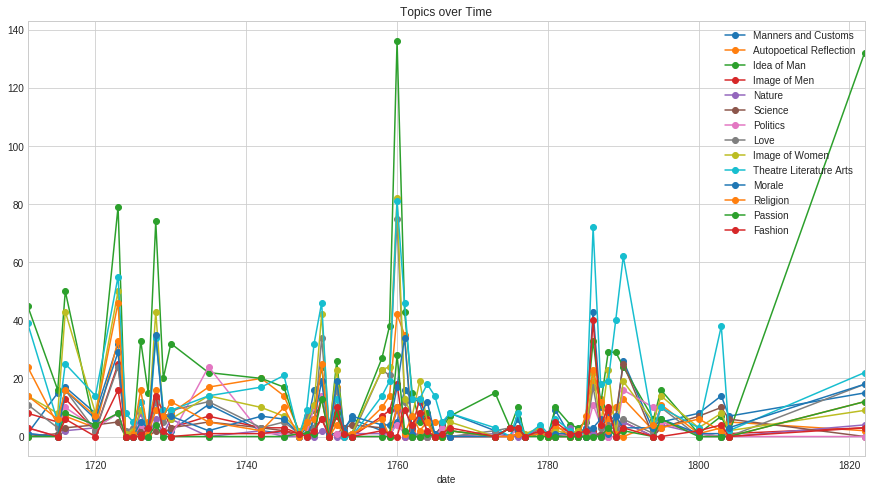

In [18]:
topics_year=texts_changes.groupby('date').sum()
plot = topics_year.plot(figsize=(15,8),marker='o',title='Topics over Time')
fig = plot.get_figure()
fig.savefig("results/plots/topics/topics_time.pdf",bbox_inches='tight')

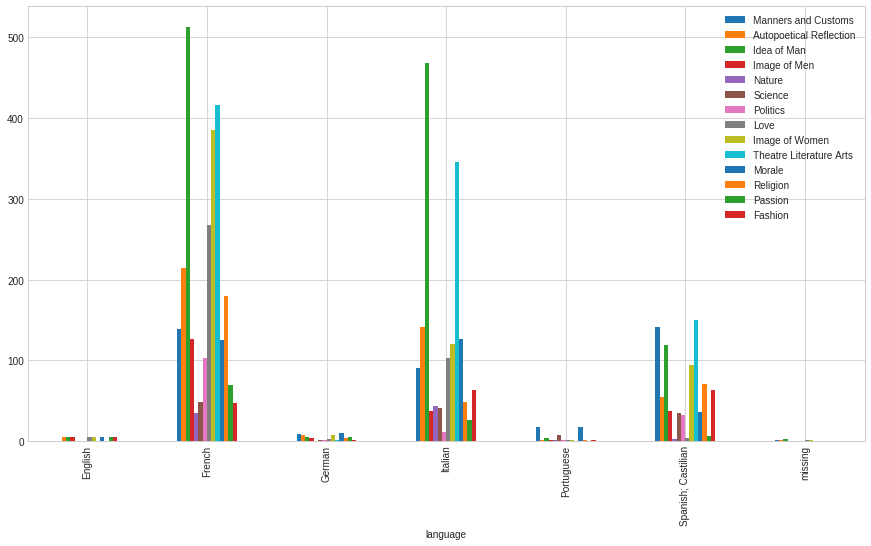

In [19]:
topics_language=texts_changes.groupby('language').sum()
ax = topics_language.drop('date',axis=1) \
    .plot(figsize=(15,8),kind='bar')
ax.set_xticks(range(len(topics_language.index)))
ax.set_xticklabels(topics_language.index, rotation=90);
fig = ax.get_figure()
fig.savefig("results/plots/topics/topics_language.pdf",bbox_inches='tight')

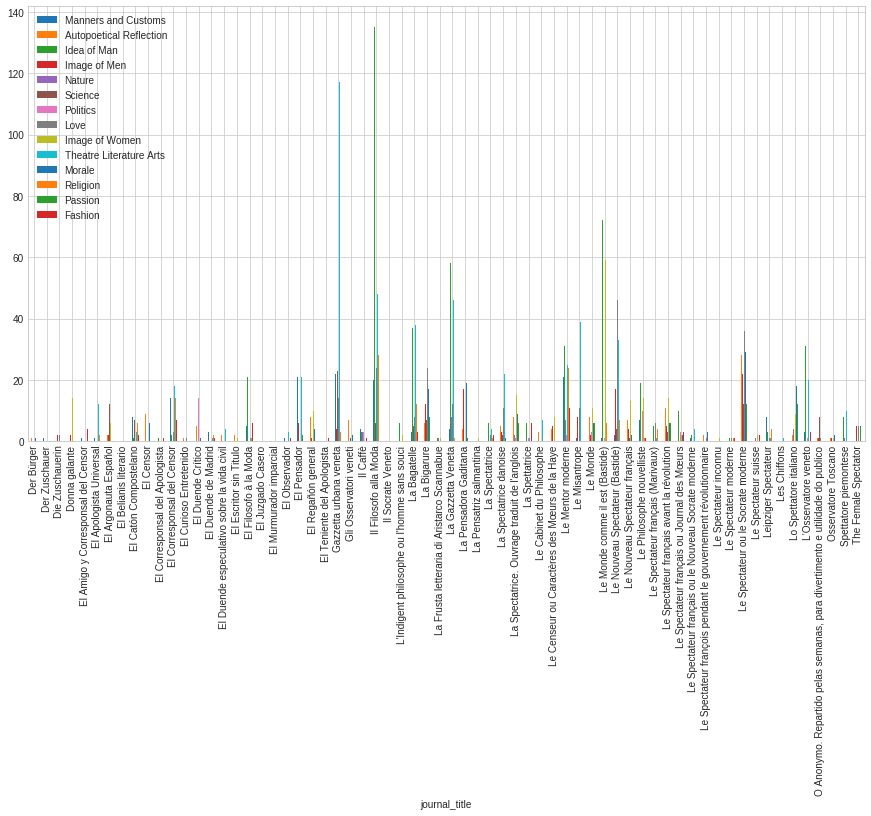

In [20]:
topics_language=texts_changes.groupby('journal_title').sum()
ax = topics_language.drop('date',axis=1) \
    .plot(figsize=(15,8),kind='bar')
ax.set_xticks(range(len(topics_language.index)))
ax.set_xticklabels(topics_language.index, rotation=90);
fig = ax.get_figure()
fig.savefig("results/plots/topics/topics_journal.pdf",bbox_inches='tight')

In [21]:
core_languages=['French','Spanish; Castilian','Italian']

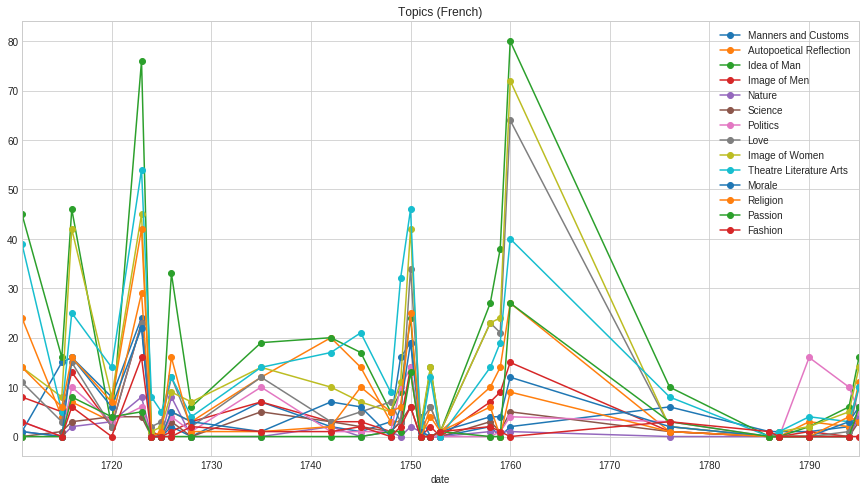

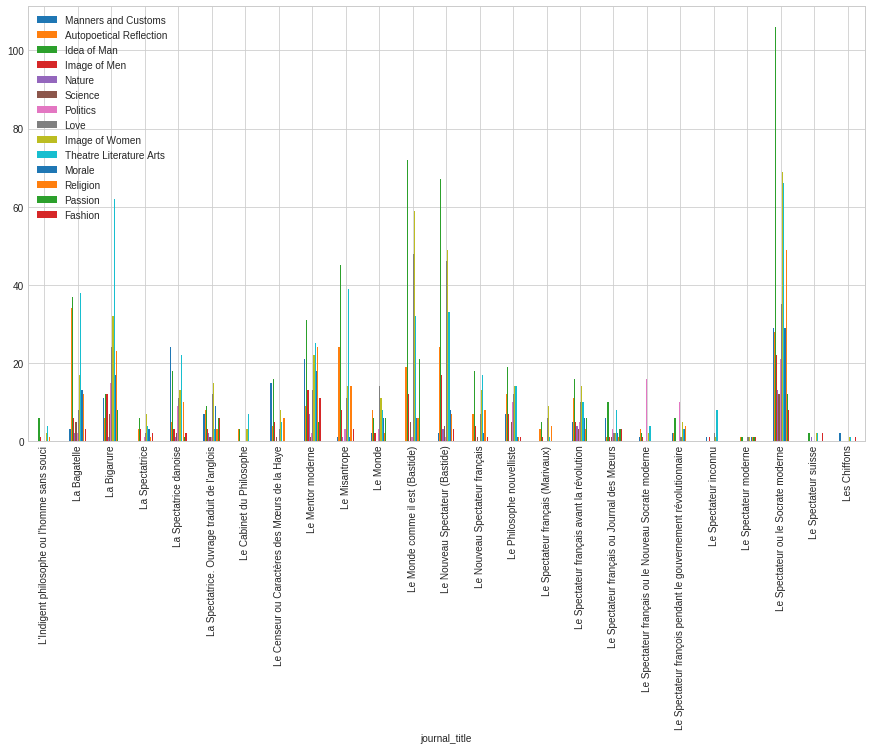

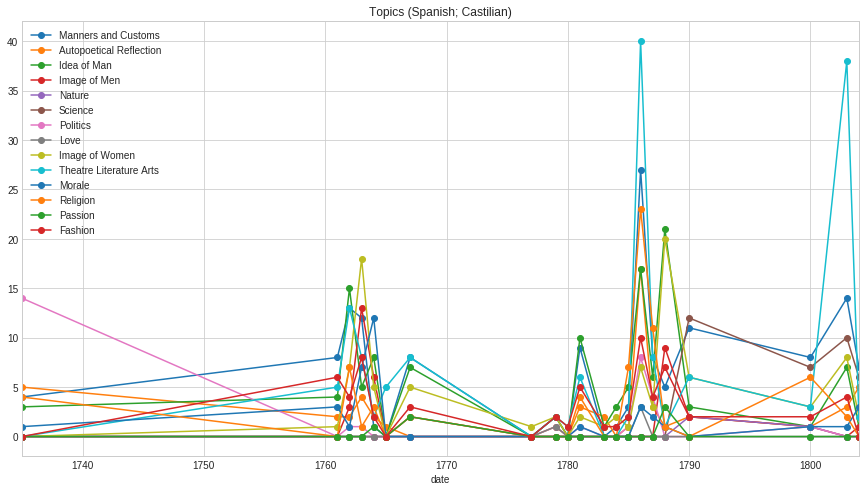

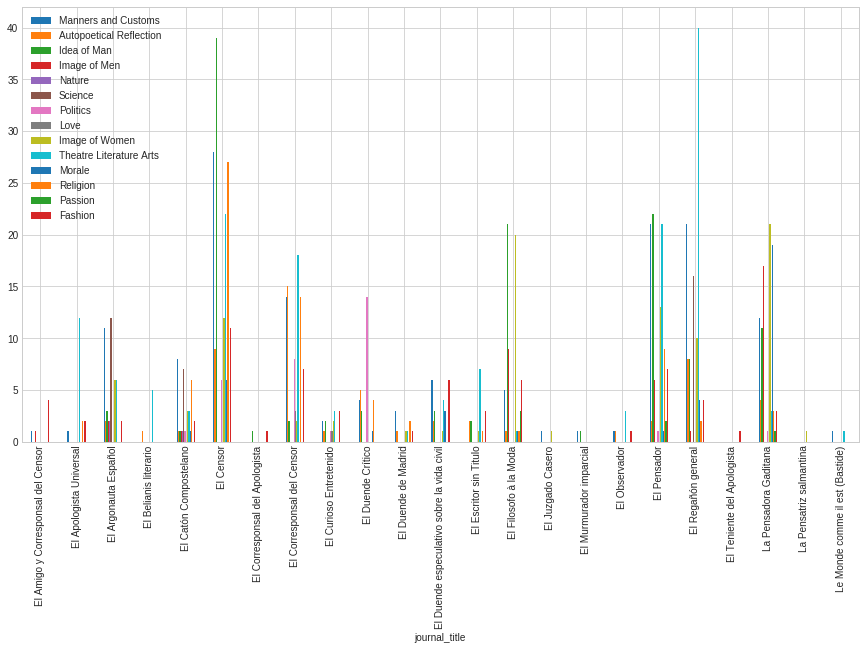

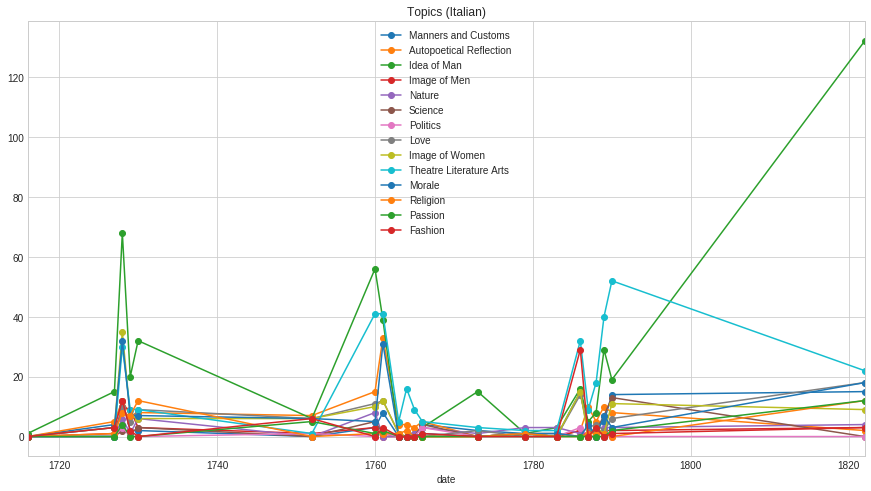

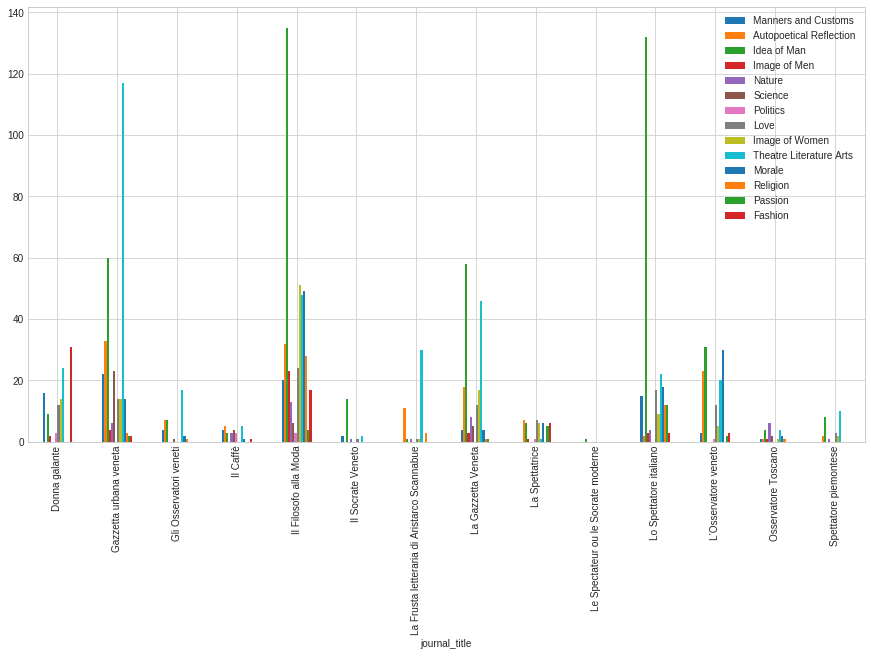

In [22]:
for language in core_languages:
    topics_year_language=texts_changes.loc[texts_corrected.language==language].groupby('date').sum()
    ax = topics_year_language.plot(figsize=(15,8),marker='o',title='Topics ('+language+')')
    fig = ax.get_figure()
    fig.savefig("results/plots/topics/topics_time_"+language+".pdf")

    topics_language=texts_changes.loc[texts_changes.language==language].groupby('journal_title').sum()
    ax = topics_language.drop('date',axis=1) \
        .plot(figsize=(15,8),kind='bar')
    ax.set_xticks(range(len(topics_language.index)))
    ax.set_xticklabels(topics_language.index, rotation=90);
    fig = ax.get_figure()
    fig.savefig("results/plots/topics/topics_journal_"+language+".pdf",bbox_inches='tight')

/home/bgeiger/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


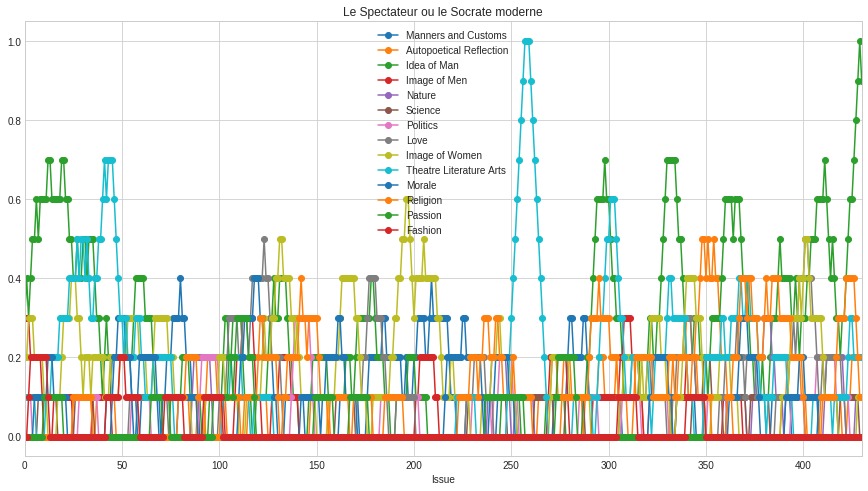

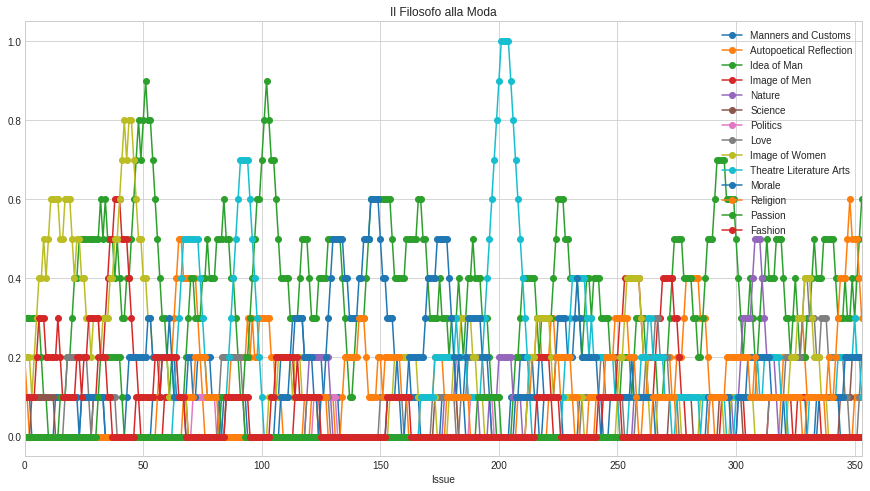

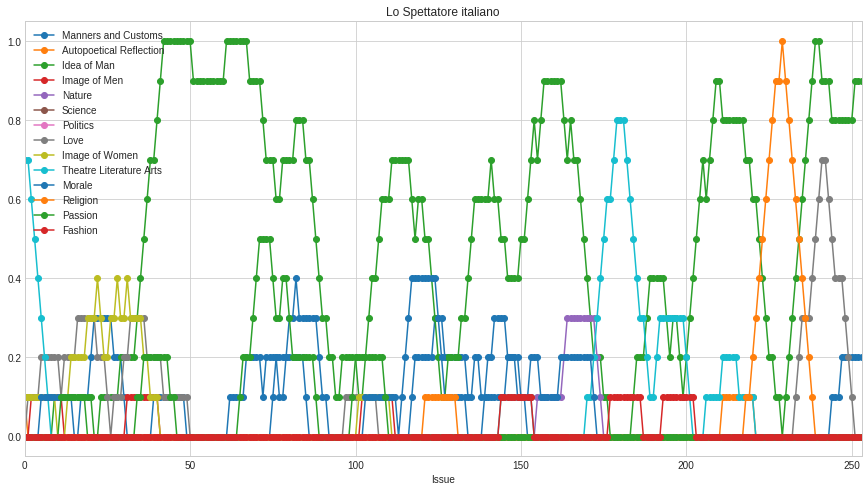

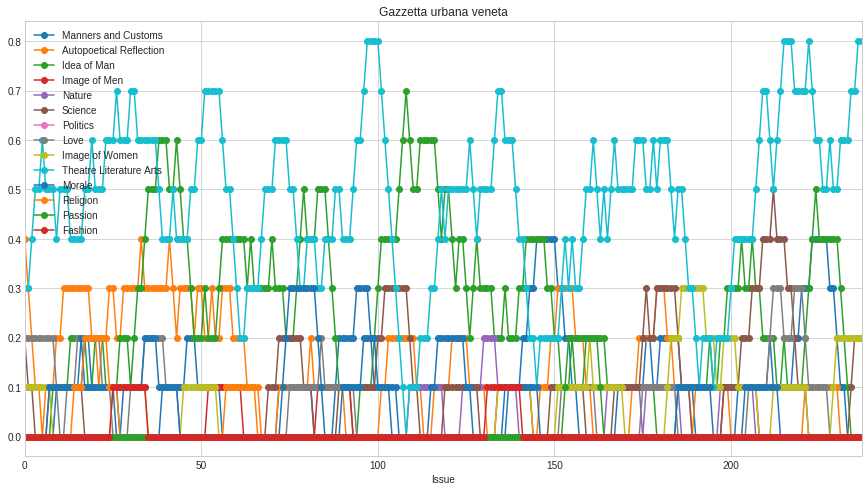

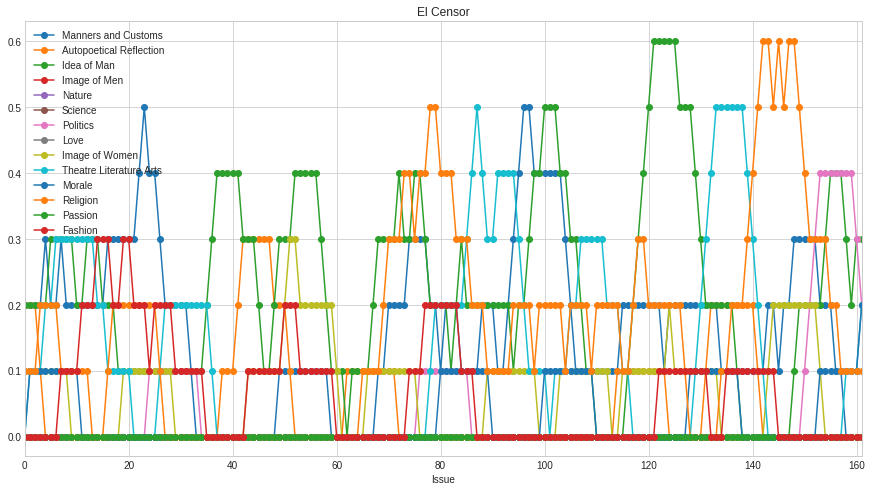

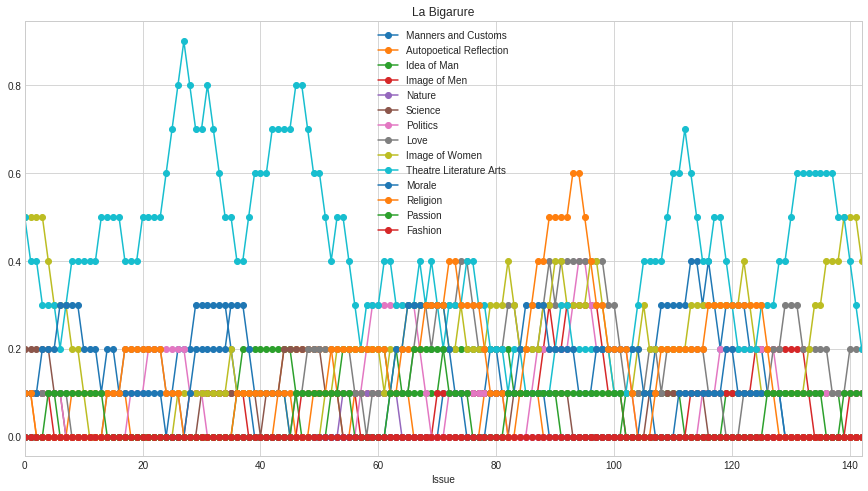

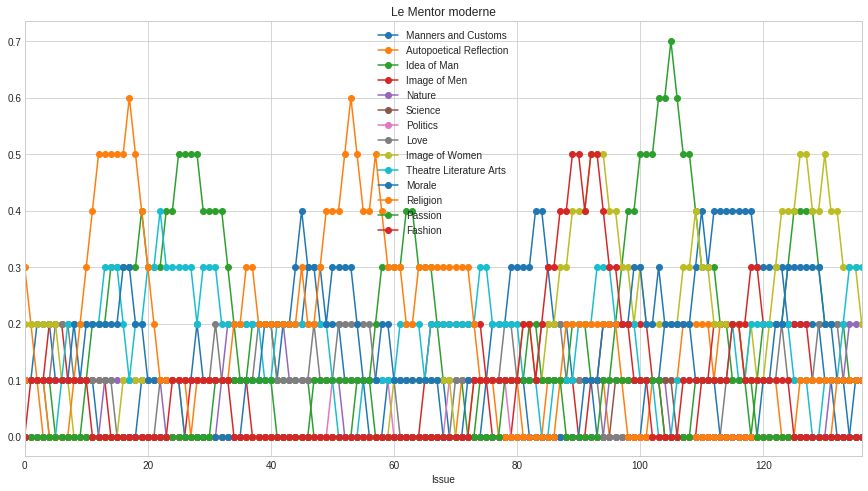

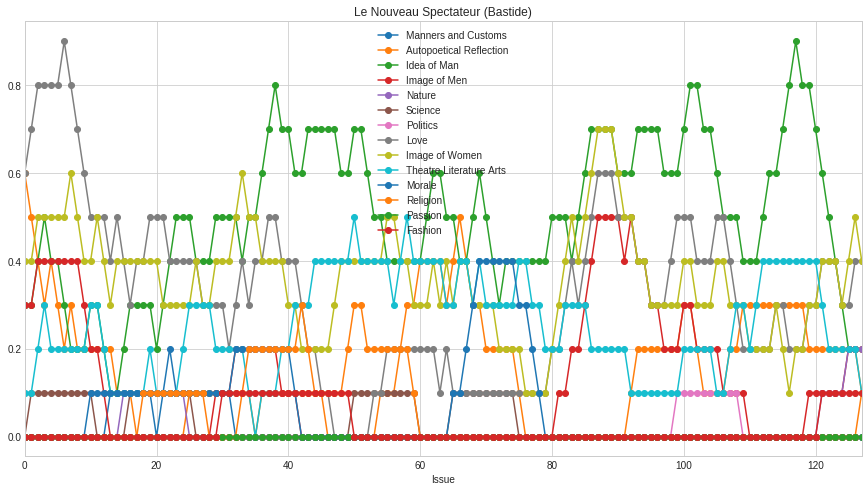

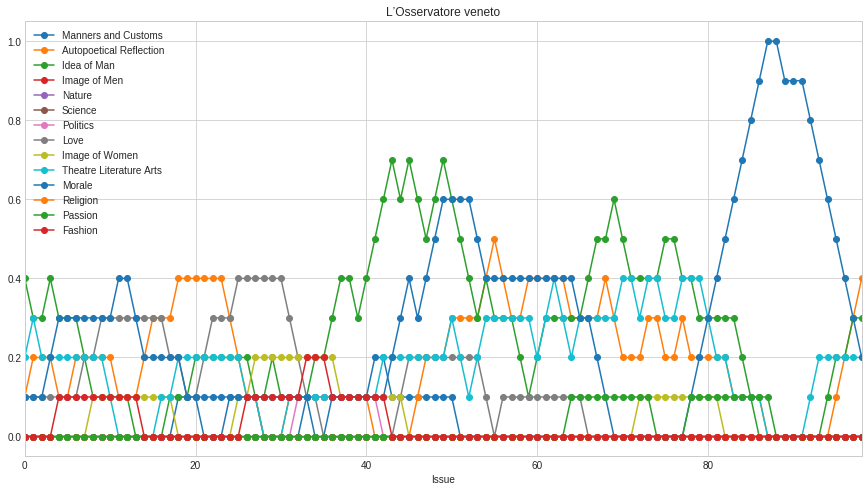

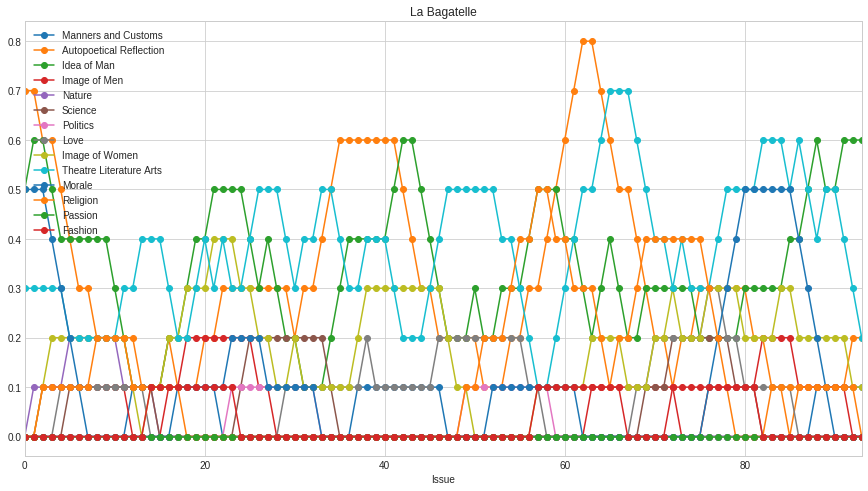

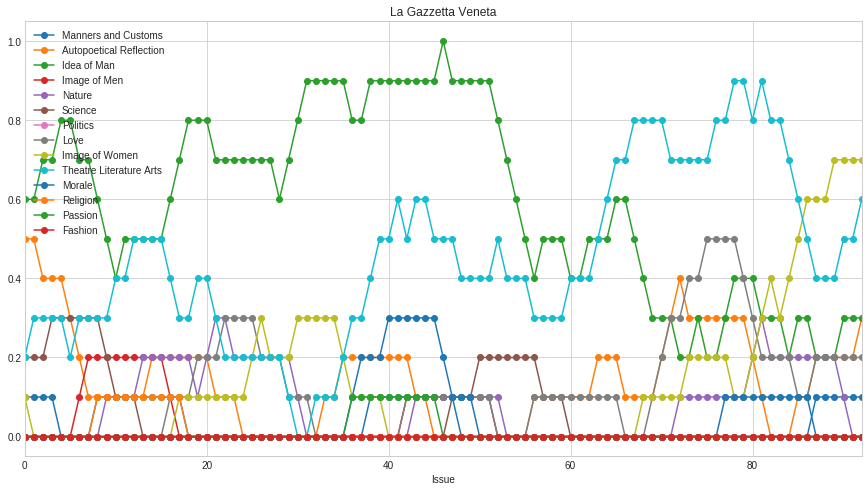

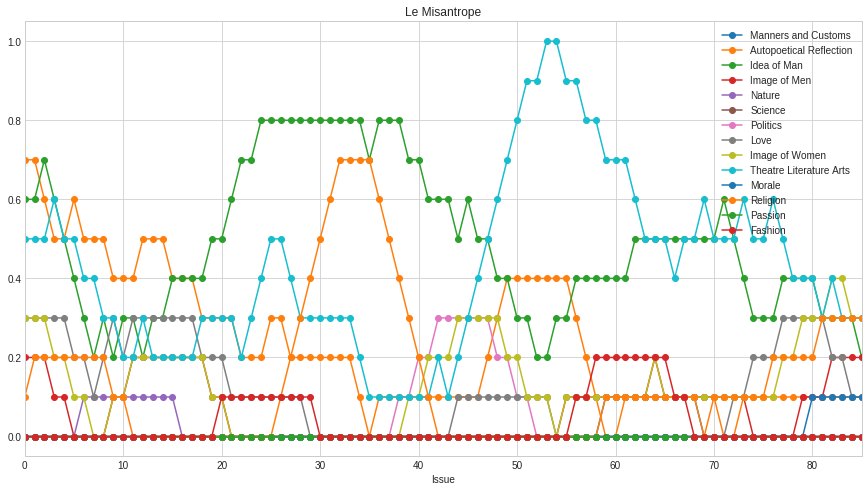

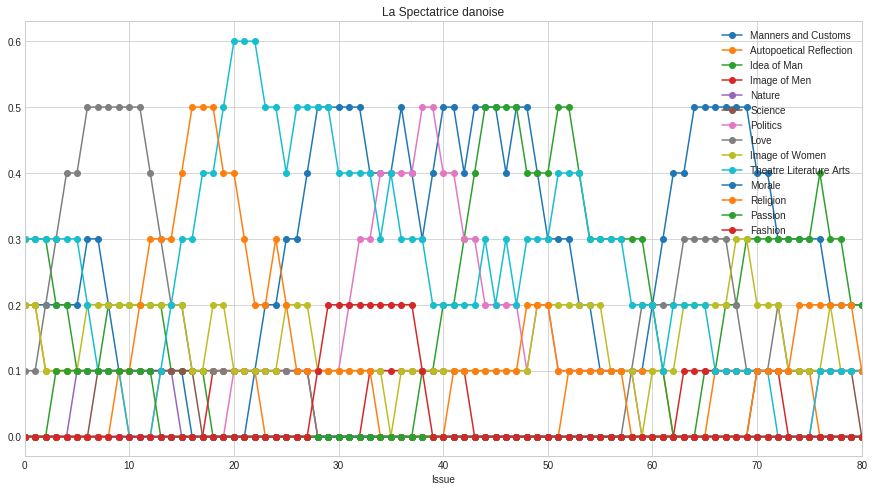

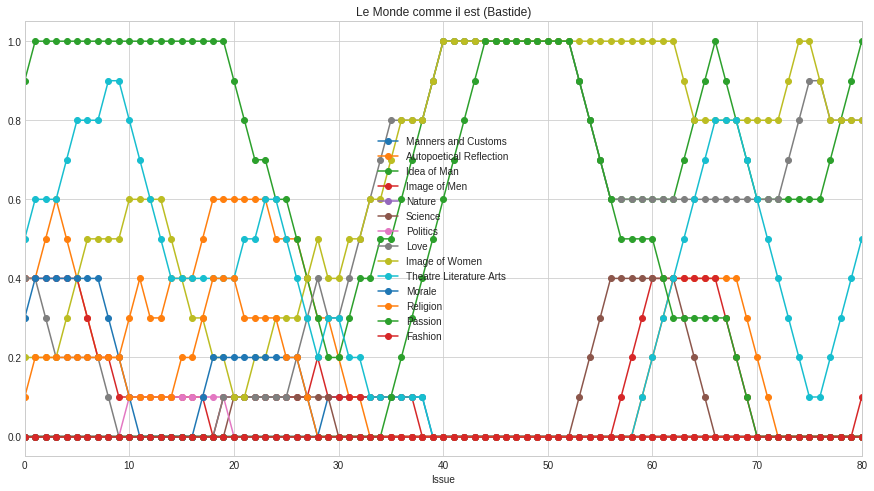

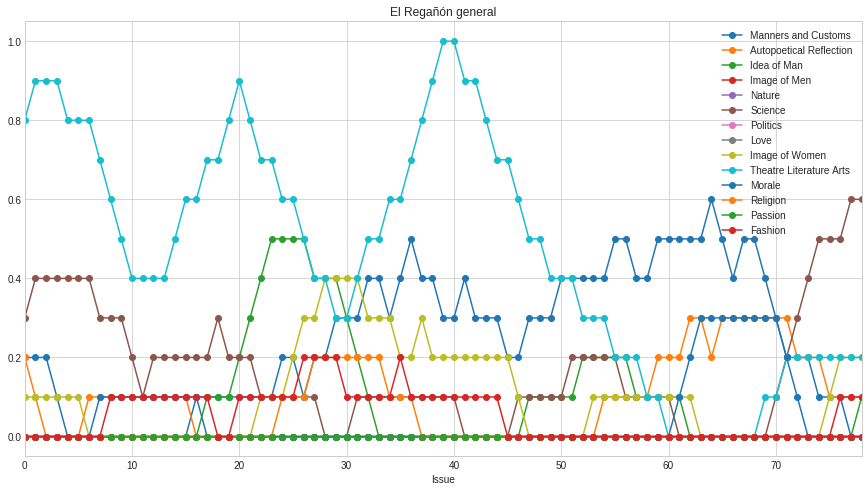

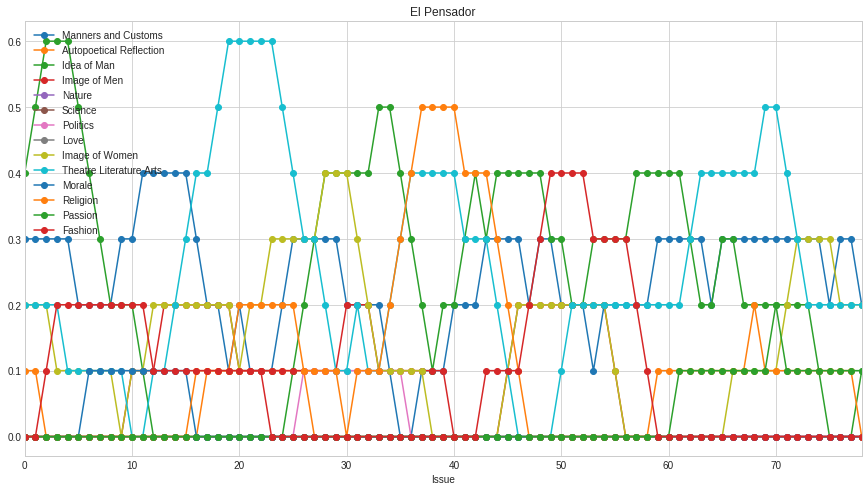

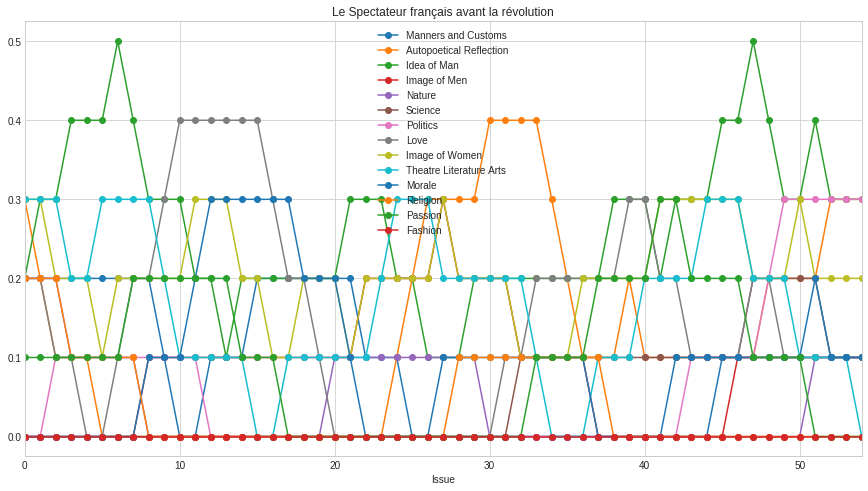

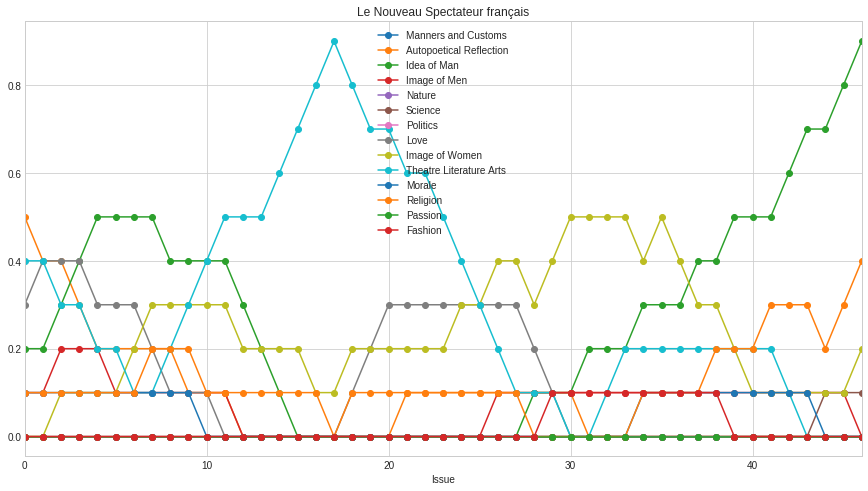

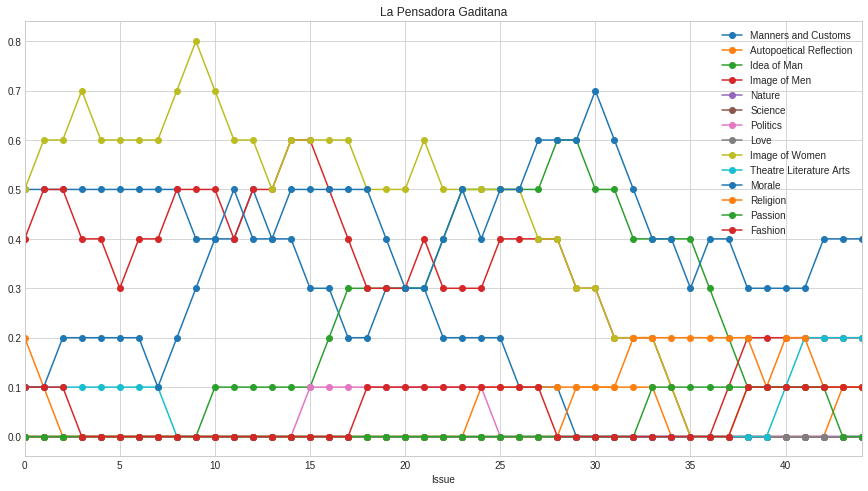

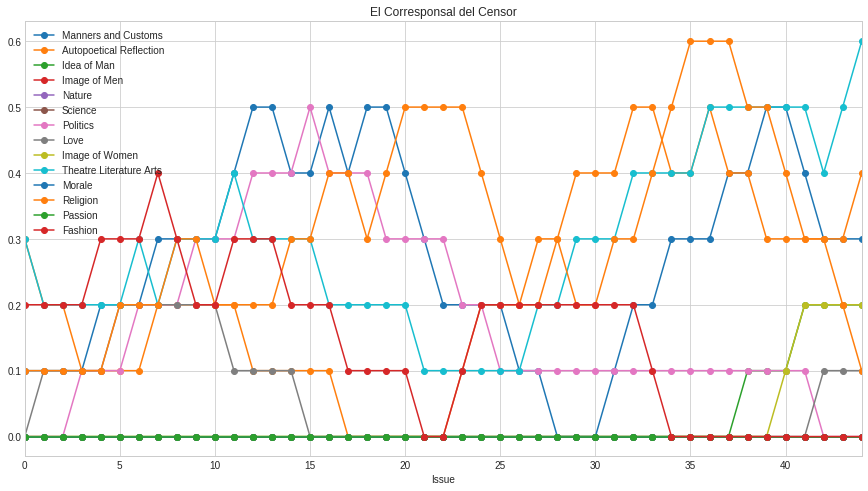

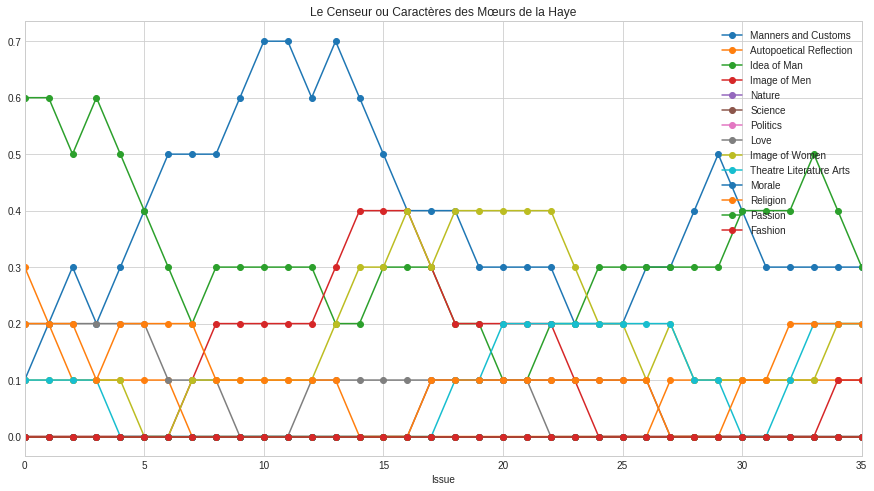

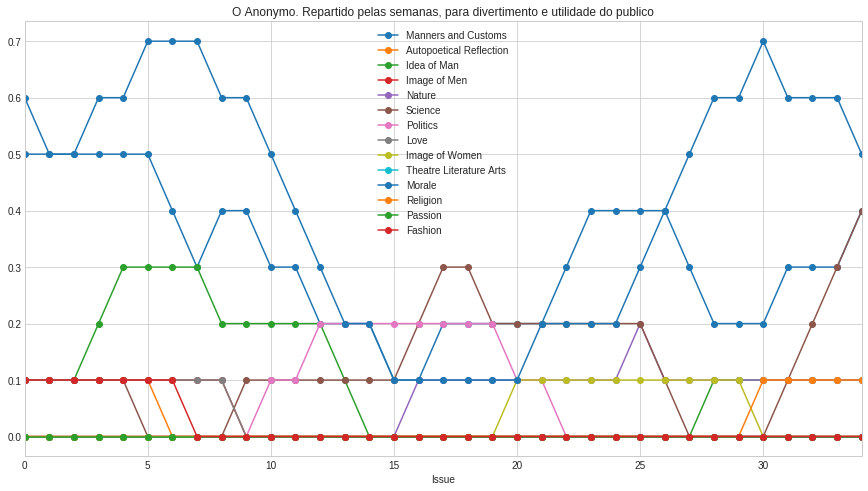

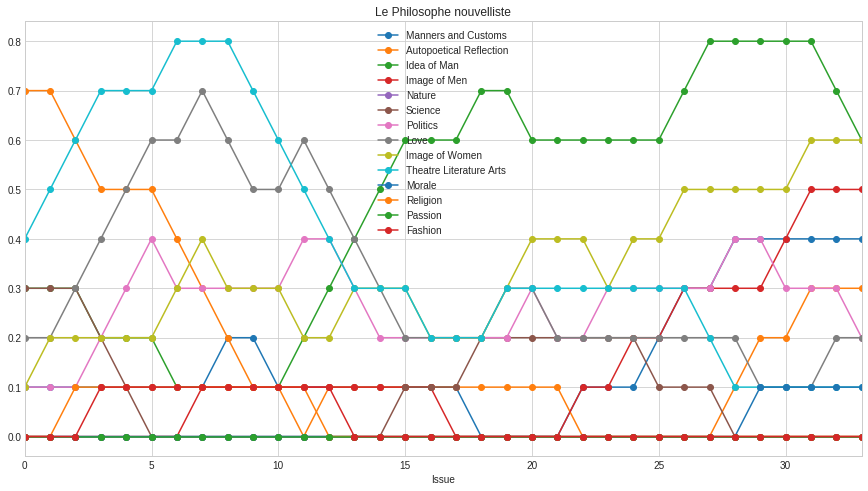

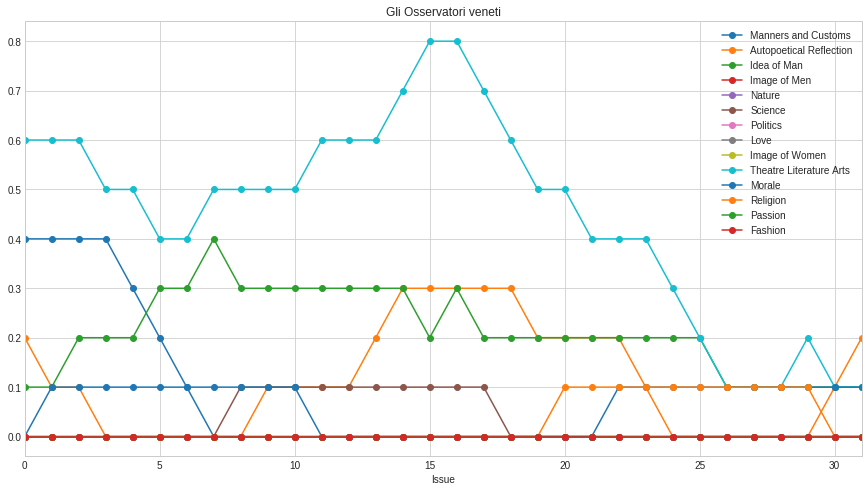

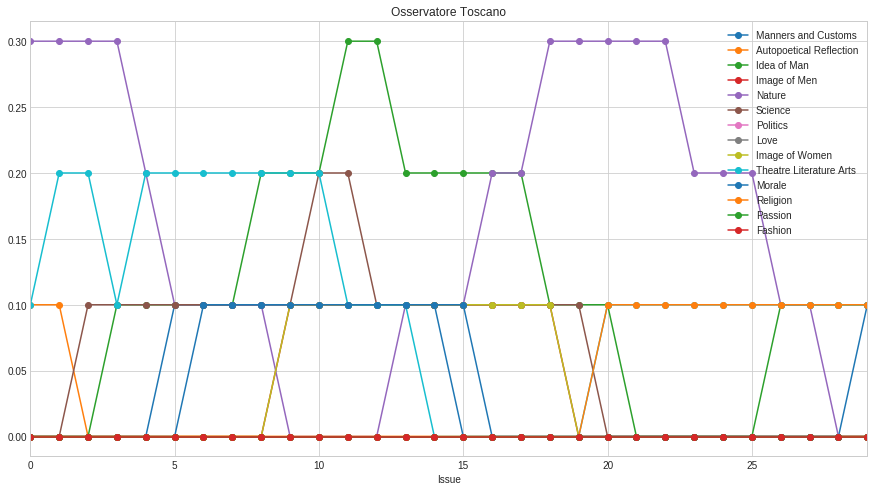

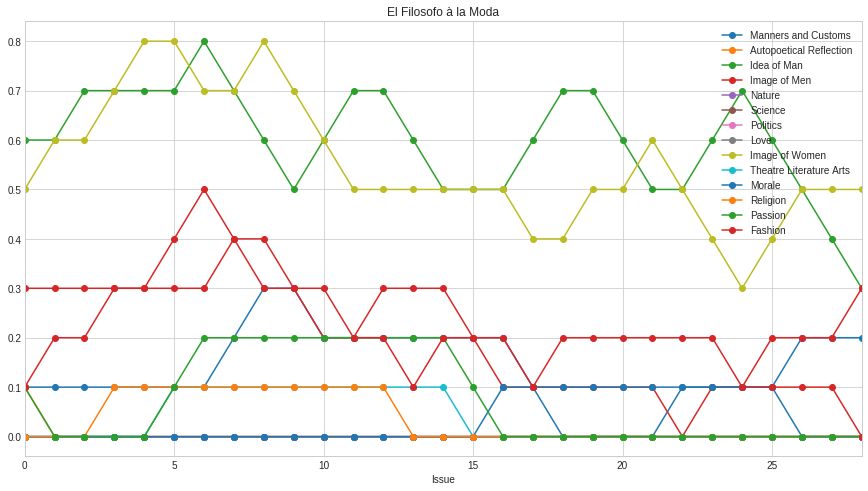

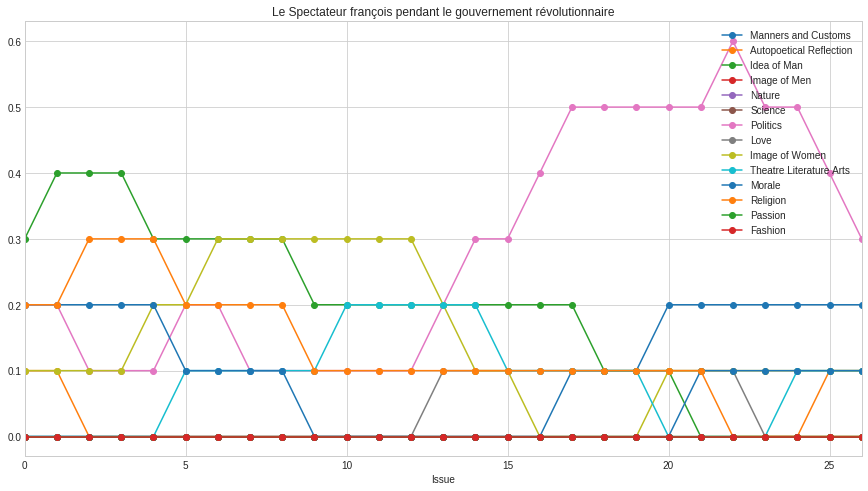

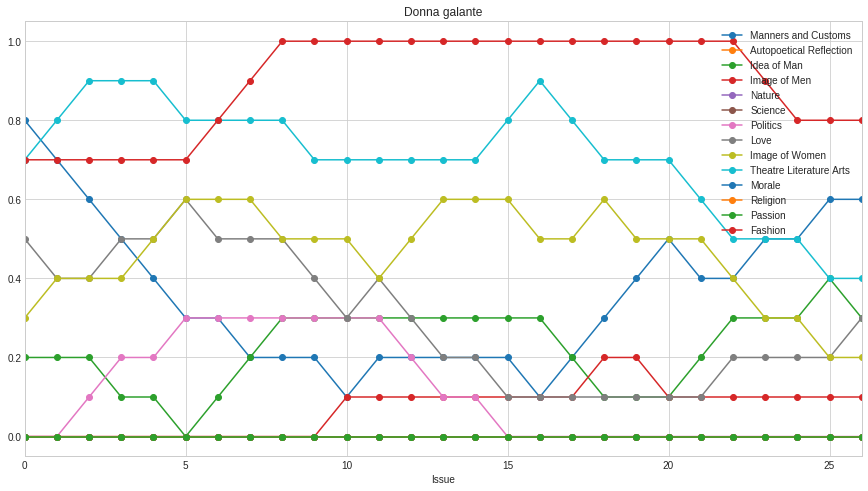

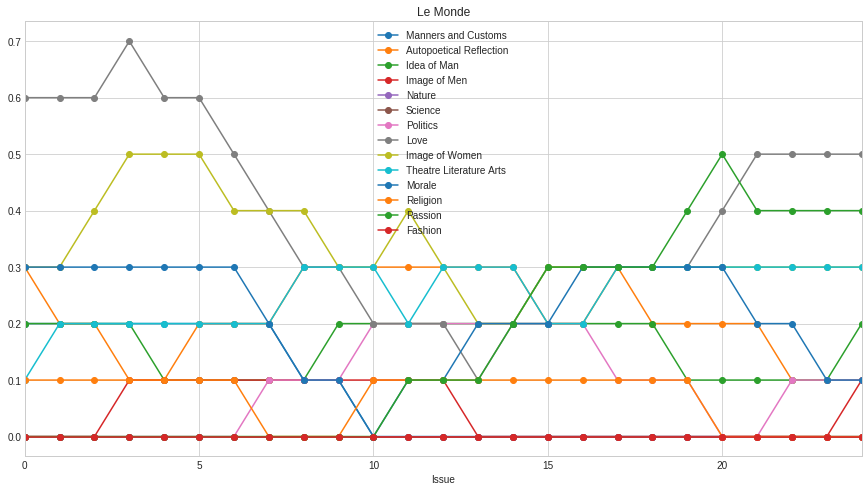

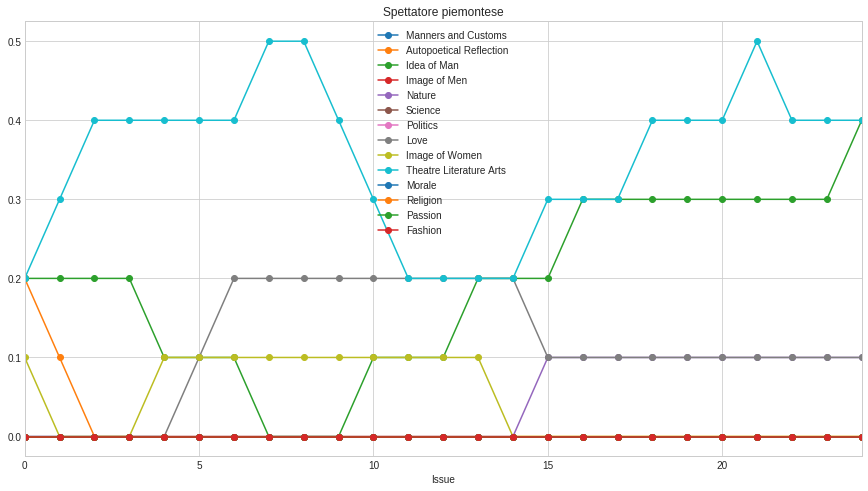

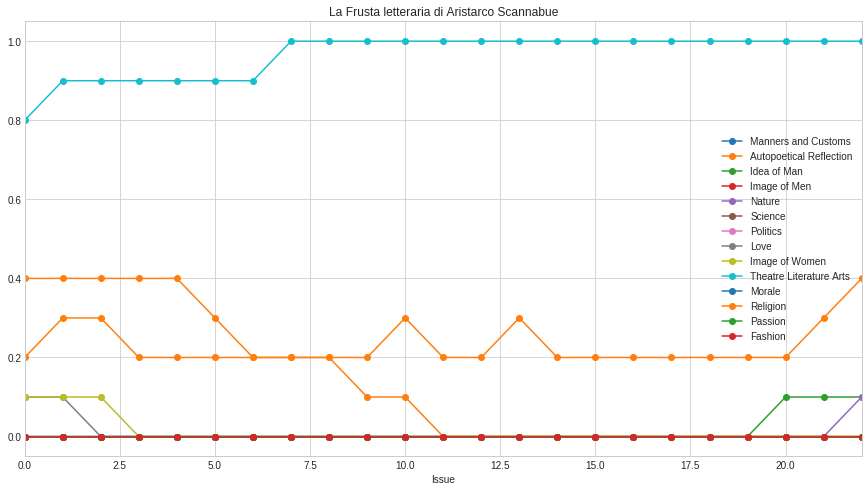

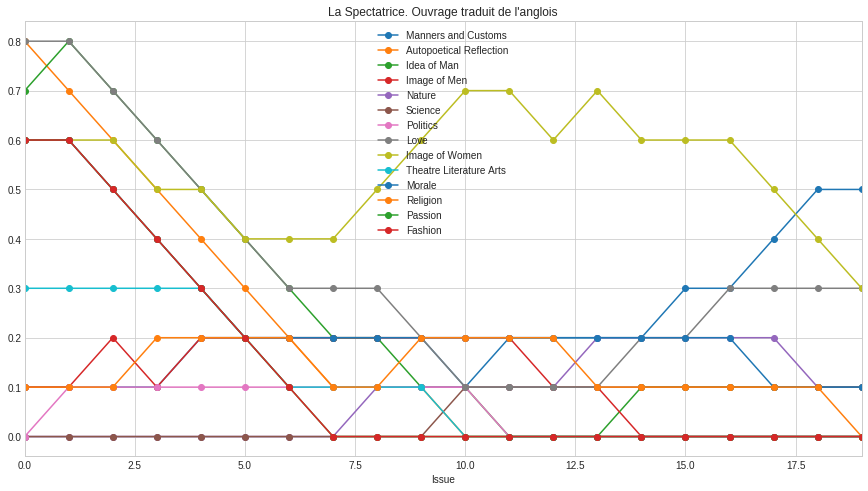

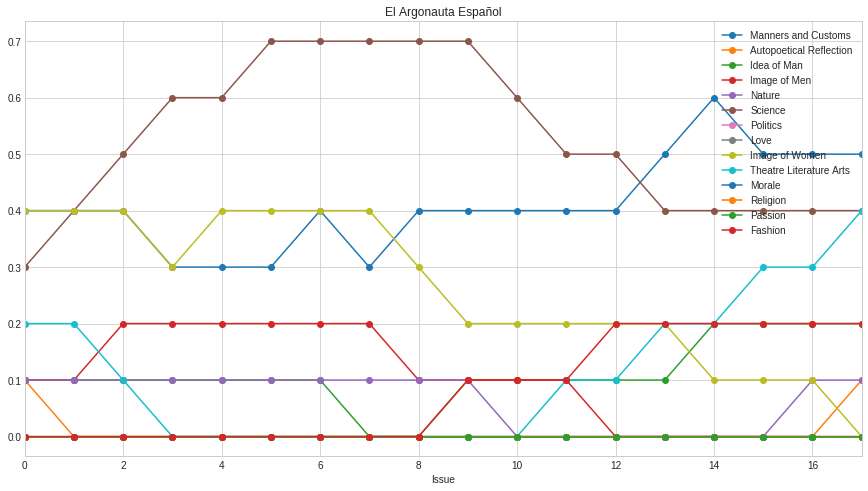

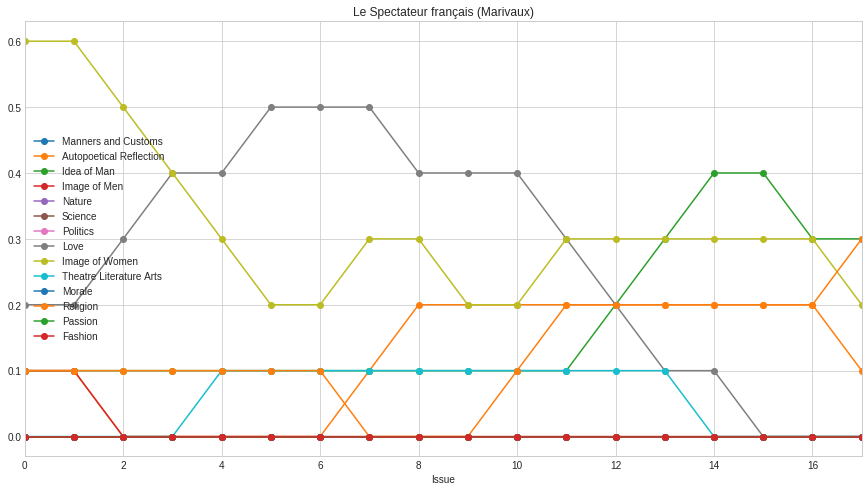

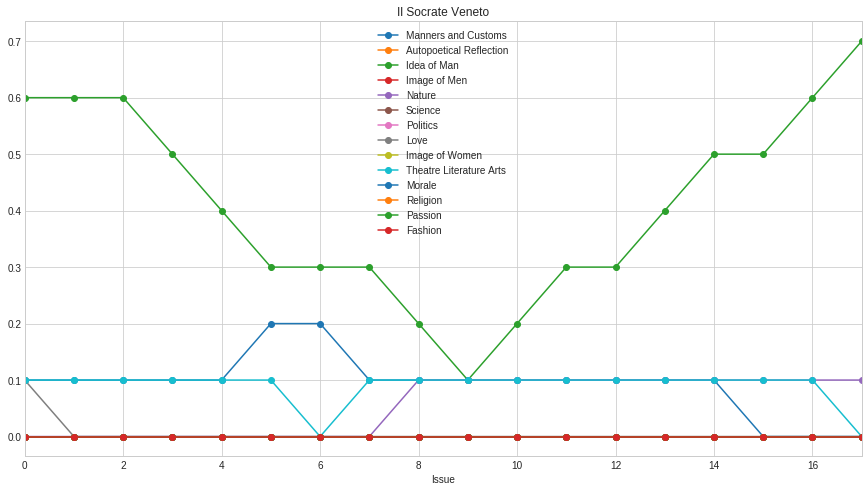

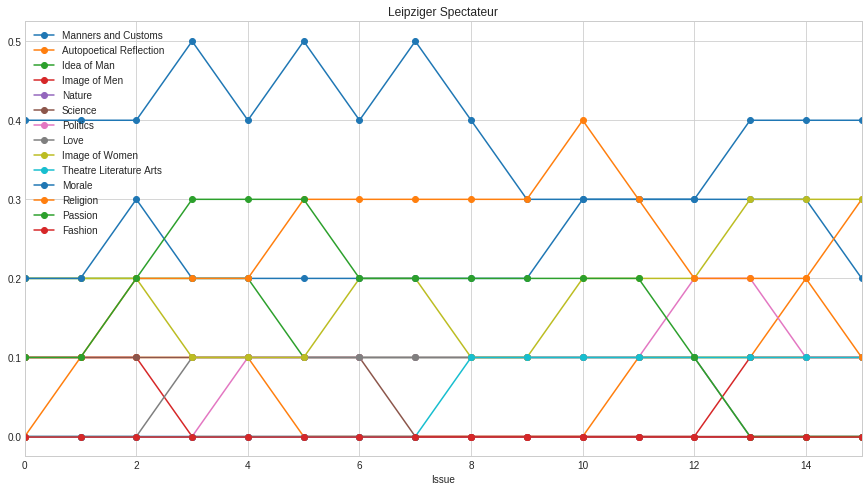

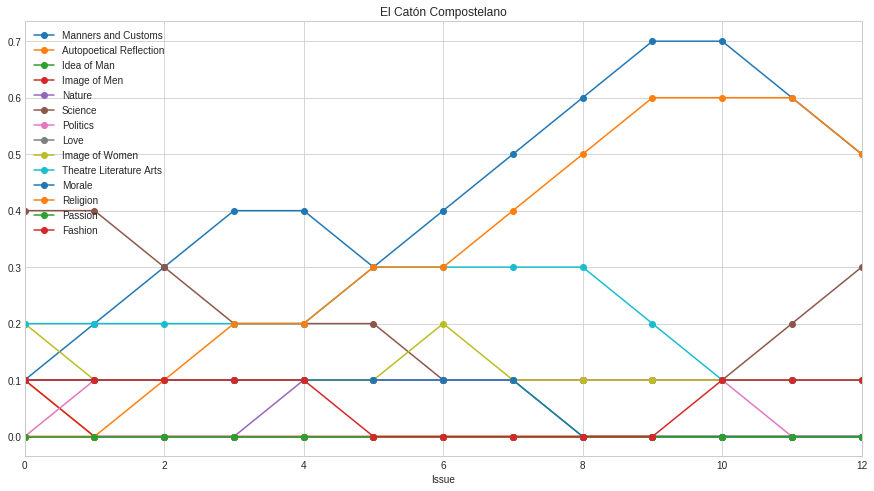

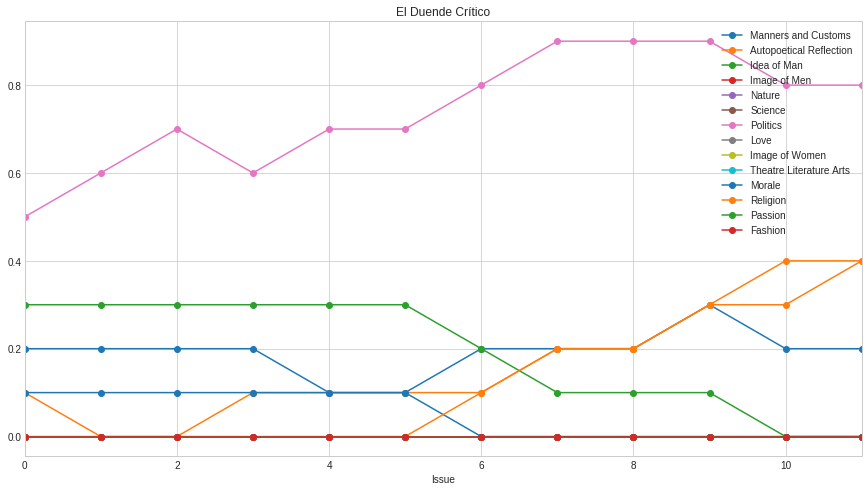

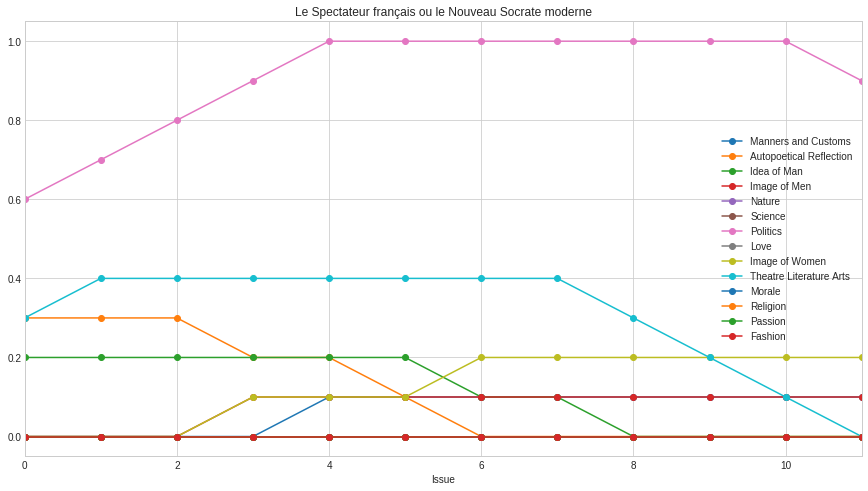

In [23]:
from numpy.lib.stride_tricks import as_strided as stride
def roll(df, w, **kwargs):
    v = df.values
    d0, d1 = v.shape
    s0, s1 = v.strides

    a = stride(v, (d0 - (w - 1), w, d1), (s0, s0, s1))

    rolled_df = pd.concat({
        row: pd.DataFrame(values, columns=df.columns)
        for row, values in zip(df.index, a)
    })

    return rolled_df.groupby(level=0, **kwargs)

window_size=10

for ind in range(len(journal_count)):
    if journal_count.values[ind]>20:
        journal=journal_count.index[ind]

        topics_year_language=texts_changes.loc[texts_changes.journal_title==journal].drop('date',axis=1)

        ax = roll(topics_year_language.sort_values(by=['volume','issue']).reset_index()[relevant_topics], window_size).mean() \
            .plot(figsize=(15,8),marker='o',title=journal)
        ax.set_xlabel('Issue')
        fig = ax.get_figure()
        fig.savefig("results/plots/topics/topics_time_"+journal+".pdf",bbox_inches='tight')

In [24]:
topics_language=texts_changes.groupby('journal_title').sum()
topics_language=topics_language.drop('date',axis=1)
topics_language=topics_language[(topics_language.T != 0).any()]
topics_language=topics_language.div(topics_language.sum(axis=1), axis=0)
topics_language

Manners and Customs  \
journal_title                                                             
Der Bürger                                                     0.000000   
Der Zuschauer                                                  0.500000   
Die Zuschauerin                                                0.000000   
Donna galante                                                  0.144144   
El Amigo y Corresponsal del Censor                             0.166667   
...                                                                 ...   
L’Osservatore veneto                                           0.023077   
O Anonymo. Repartido pelas semanas, para divert...             0.298246   
Osservatore Toscano                                            0.043478   
Spettatore piemontese                                          0.000000   
The Female Spectator                                           0.000000   

                                                    Autopoetical Reflection  \
journal_title                                                                 
Der Bürger                                                         0.500000   
Der Zuschauer                                                      0.000000   
Die Zuschauerin                                                    0.166667   
Donna galante                                                      0.000000   
El Amigo y Corresponsal del Censor                                 0.000000   
...                                                                     ...   
L’Osservatore veneto                                               0.176923   
O Anonymo. Repartido pelas semanas, para divert...                 0.017544   
Osservatore Toscano                                                0.043478   
Spettatore piemontese                                              0.076923   
The Female Spectator                                               0.125000   

                                                    Idea of Man  Image of Men  \
journal_title                                                                   
Der Bürger                                             0.000000      0.000000   
Der Zuschauer                                          0.000000      0.000000   
Die Zuschauerin                                        0.111111      0.111111   
Donna galante                                          0.081081      0.018018   
El Amigo y Corresponsal del Censor                     0.000000      0.166667   
...                                                         ...           ...   
L’Osservatore veneto                                   0.238462      0.000000   
O Anonymo. Repartido pelas semanas, para divert...     0.070175      0.017544   
Osservatore Toscano                                    0.173913      0.043478   
Spettatore piemontese                                  0.307692      0.000000   
The Female Spectator                                   0.125000      0.125000   

                                                      Nature   Science  \
journal_title                                                            
Der Bürger                                          0.000000  0.000000   
Der Zuschauer                                       0.000000  0.500000   
Die Zuschauerin                                     0.000000  0.000000   
Donna galante                                       0.000000  0.000000   
El Amigo y Corresponsal del Censor                  0.000000  0.000000   
...                                                      ...       ...   
L’Osservatore veneto                                0.000000  0.000000   
O Anonymo. Repartido pelas semanas, para divert...  0.035088  0.140351   
Osservatore Toscano                                 0.260870  0.086957   
Spettatore piemontese                               0.038462  0.000000   
The Female Spectator                                0.000000  0.000000   

                               

In [25]:
language_journal=texts_changes.pivot_table(values='date', index='journal_title',columns='language',aggfunc='count')
language_journal[language_journal > 0] = 1
language_journal = language_journal.fillna(0)
language_journal

language                                            English  French  German  \
journal_title                                                                 
Der Bürger                                              0.0     0.0     1.0   
Der Zuschauer                                           0.0     0.0     1.0   
Die Zuschauerin                                         0.0     0.0     1.0   
Donna galante                                           0.0     0.0     0.0   
El Amigo y Corresponsal del Censor                      0.0     0.0     0.0   
...                                                     ...     ...     ...   
L’Osservatore veneto                                    0.0     0.0     0.0   
O Anonymo. Repartido pelas semanas, para divert...      0.0     0.0     0.0   
Osservatore Toscano                                     0.0     0.0     0.0   
Spettatore piemontese                                   0.0     0.0     0.0   
The Female Spectator                                    1.0     0.0     0.0   

language                                            Italian  Portuguese  \
journal_title                                                             
Der Bürger                                              0.0         0.0   
Der Zuschauer                                           0.0         0.0   
Die Zuschauerin                                         0.0         0.0   
Donna galante                                           1.0         0.0   
El Amigo y Corresponsal del Censor                      0.0         0.0   
...                                                     ...         ...   
L’Osservatore veneto                                    1.0         0.0   
O Anonymo. Repartido pelas semanas, para divert...      0.0         1.0   
Osservatore Toscano                                     1.0         0.0   
Spettatore piemontese                                   1.0         0.0   
The Female Spectator                                    0.0         0.0   

language                                            Spanish; Castilian  \
journal_title                                                            
Der Bürger                                                         0.0   
Der Zuschauer                                                      0.0   
Die Zuschauerin                                                    0.0   
Donna galante                                                      0.0   
El Amigo y Corresponsal del Censor                                 1.0   
...                                                                ...   
L’Osservatore veneto                                               0.0   
O Anonymo. Repartido pelas semanas, para divert...                 0.0   
Osservatore Toscano                                                0.0   
Spettatore piemontese                                              0.0   
The Female Spectator                                               0.0   

language                                            missing  
journal_title                                                
Der Bürger                                              0.0  
Der Zuschauer                                           0.0  
Die Zuschauerin                                         0.0  
Donna galante                                           0.0  
El Amigo y Corresponsal del Censor                      0.0  
...                                                     ...  
L’Osservatore veneto                                    0.0  
O Anonymo. Repartido pelas semanas, para divert...      0.0  
Osservatore Toscano                                     0.0  
Spettatore piemontese                                   0.0  
The Female Spectator                                    0.0  

[66 rows x 7 columns]

In [32]:
Number_of_Clusters=3

from IB import *
ds = dataset(pxy=topics_language.values/np.sum(topics_language.values))
ds.clamped=True
m=model(ds=ds,alpha=0,beta=25,Tmax=Number_of_Clusters)
m.fit(keep_steps=True)

import os.path
fname='results_' + str(m.Tmax) + '.obj'
if not os.path.isfile(fname):
    file_result = open(fname, 'wb')
    pickle.dump(m, file_result)
    print('Stored first solution')
file_result = open(fname, 'rb')
old_m=pickle.load(file_result)
if (old_m.Tmax == m.Tmax) and (m.iyt>old_m.iyt):
    file_result = open(fname, 'wb')
    pickle.dump(m, file_result)
    print('Better solution found')

step 1: I(X,T) = 2.585, H(T) = 2.585, T = 6, H(X) = 6.044, I(Y,T) = 0.089, I(X,Y) = 1.030, L = 0.361
******************** Beginning IB fit with the following parameters ********************
alpha = 0.00, beta = 25.0, Tmax = 6, p0 = None, wav = None, geo = False,
ctol_abs = 1e-04, ctol_rel = 0e+00, cthresh = 1, ptol = 1e-08, zeroLtol = 0e+00
smoothing_type = None, smoothing_center = None, s = None, d = None
****************************************************************************************
step 2: I(X,T) = 2.516, H(T) = 2.516, T = 6, H(X) = 6.044, I(Y,T) = 0.368, I(X,Y) = 1.030, L = -6.685
step 3: I(X,T) = 2.486, H(T) = 2.486, T = 6, H(X) = 6.044, I(Y,T) = 0.406, I(X,Y) = 1.030, L = -7.652
step 4: I(X,T) = 2.463, H(T) = 2.463, T = 6, H(X) = 6.044, I(Y,T) = 0.419, I(X,Y) = 1.030, L = -8.015
step 5: I(X,T) = 2.425, H(T) = 2.425, T = 6, H(X) = 6.044, I(Y,T) = 0.423, I(X,Y) = 1.030, L = -8.157
step 6: I(X,T) = 2.446, H(T) = 2.446, T = 6, H(X) = 6.044, I(Y,T) = 0.428, I(X,Y) = 1.030, L 

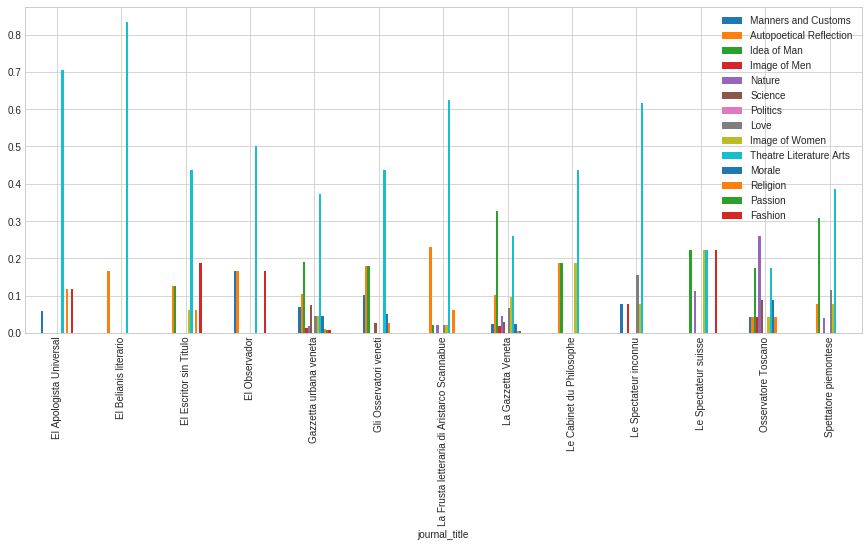

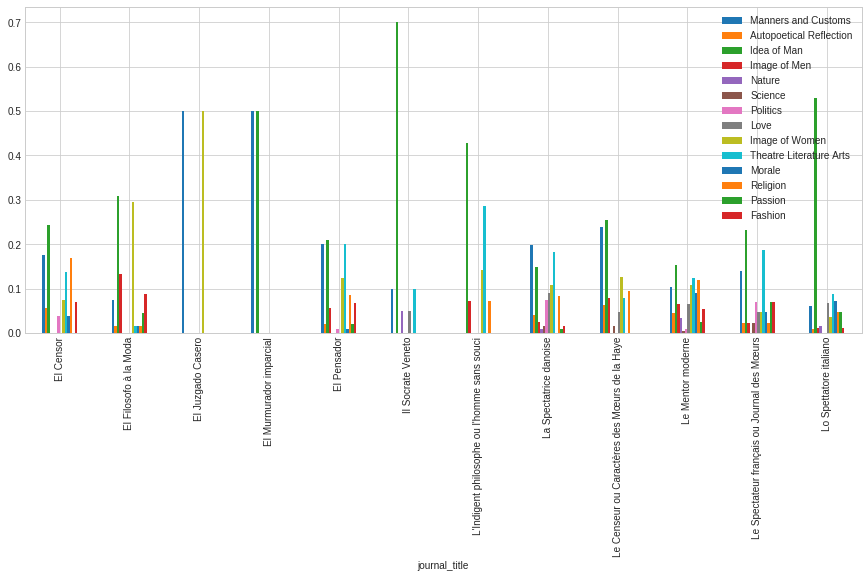

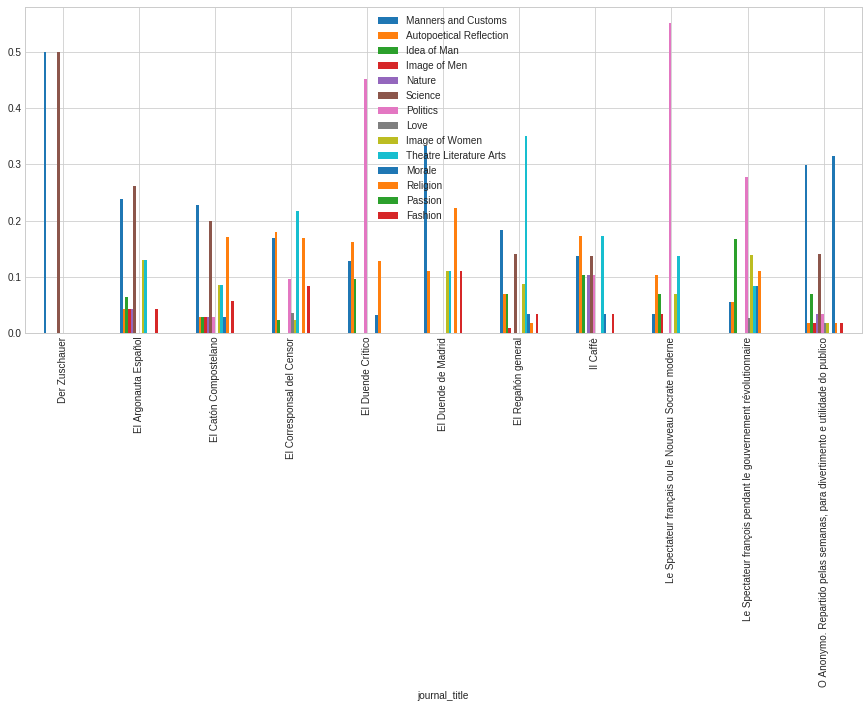

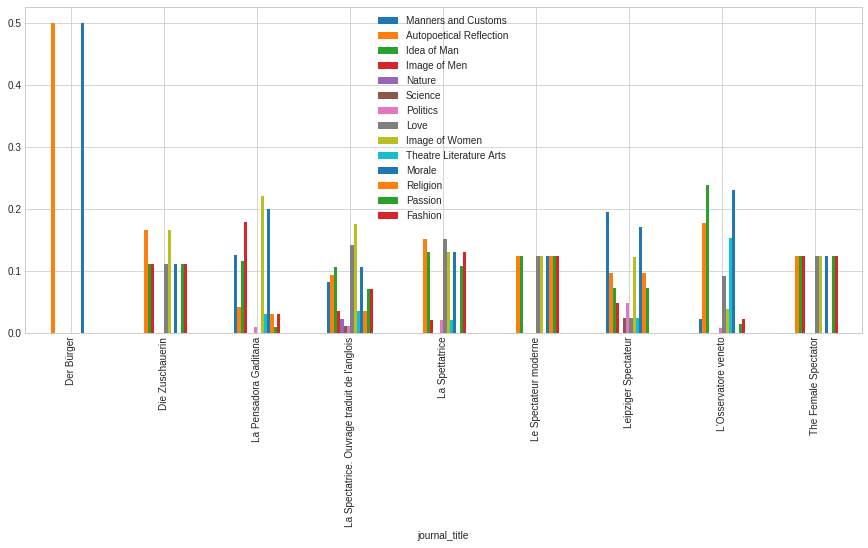

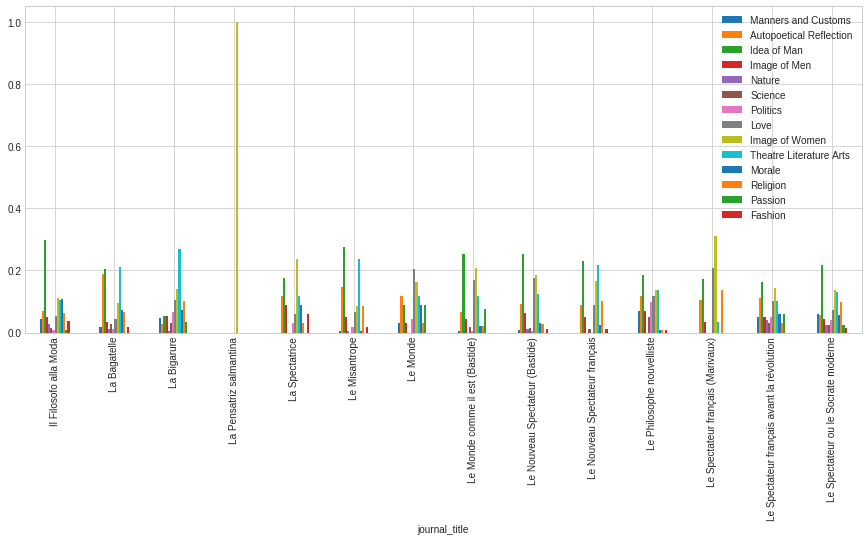

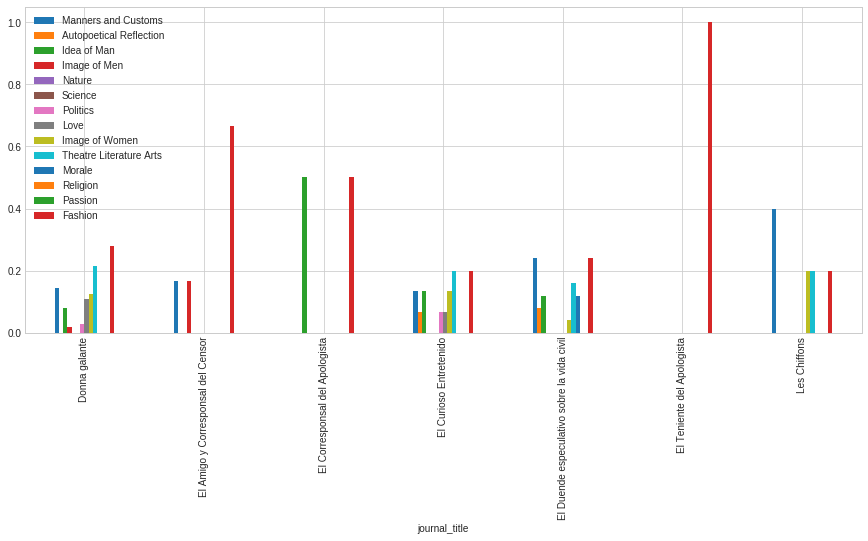

In [33]:
file_result = open('results_' + str(Number_of_Clusters) + '.obj', 'rb')
best_m=pickle.load(file_result)

for Cluster in range(Number_of_Clusters):
    ax=topics_language.loc[best_m.qt_x[Cluster]==1,:].plot(figsize=(15,6),kind='bar')
    fig = ax.get_figure()
    fig.savefig("results/plots/topics/main_topics_"+str(Number_of_Clusters)+"_clusters_"+str(Cluster)+".pdf",bbox_inches='tight')

/home/bgeiger/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app
/home/bgeiger/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app
/home/bgeiger/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app
/home/bgeiger/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ip

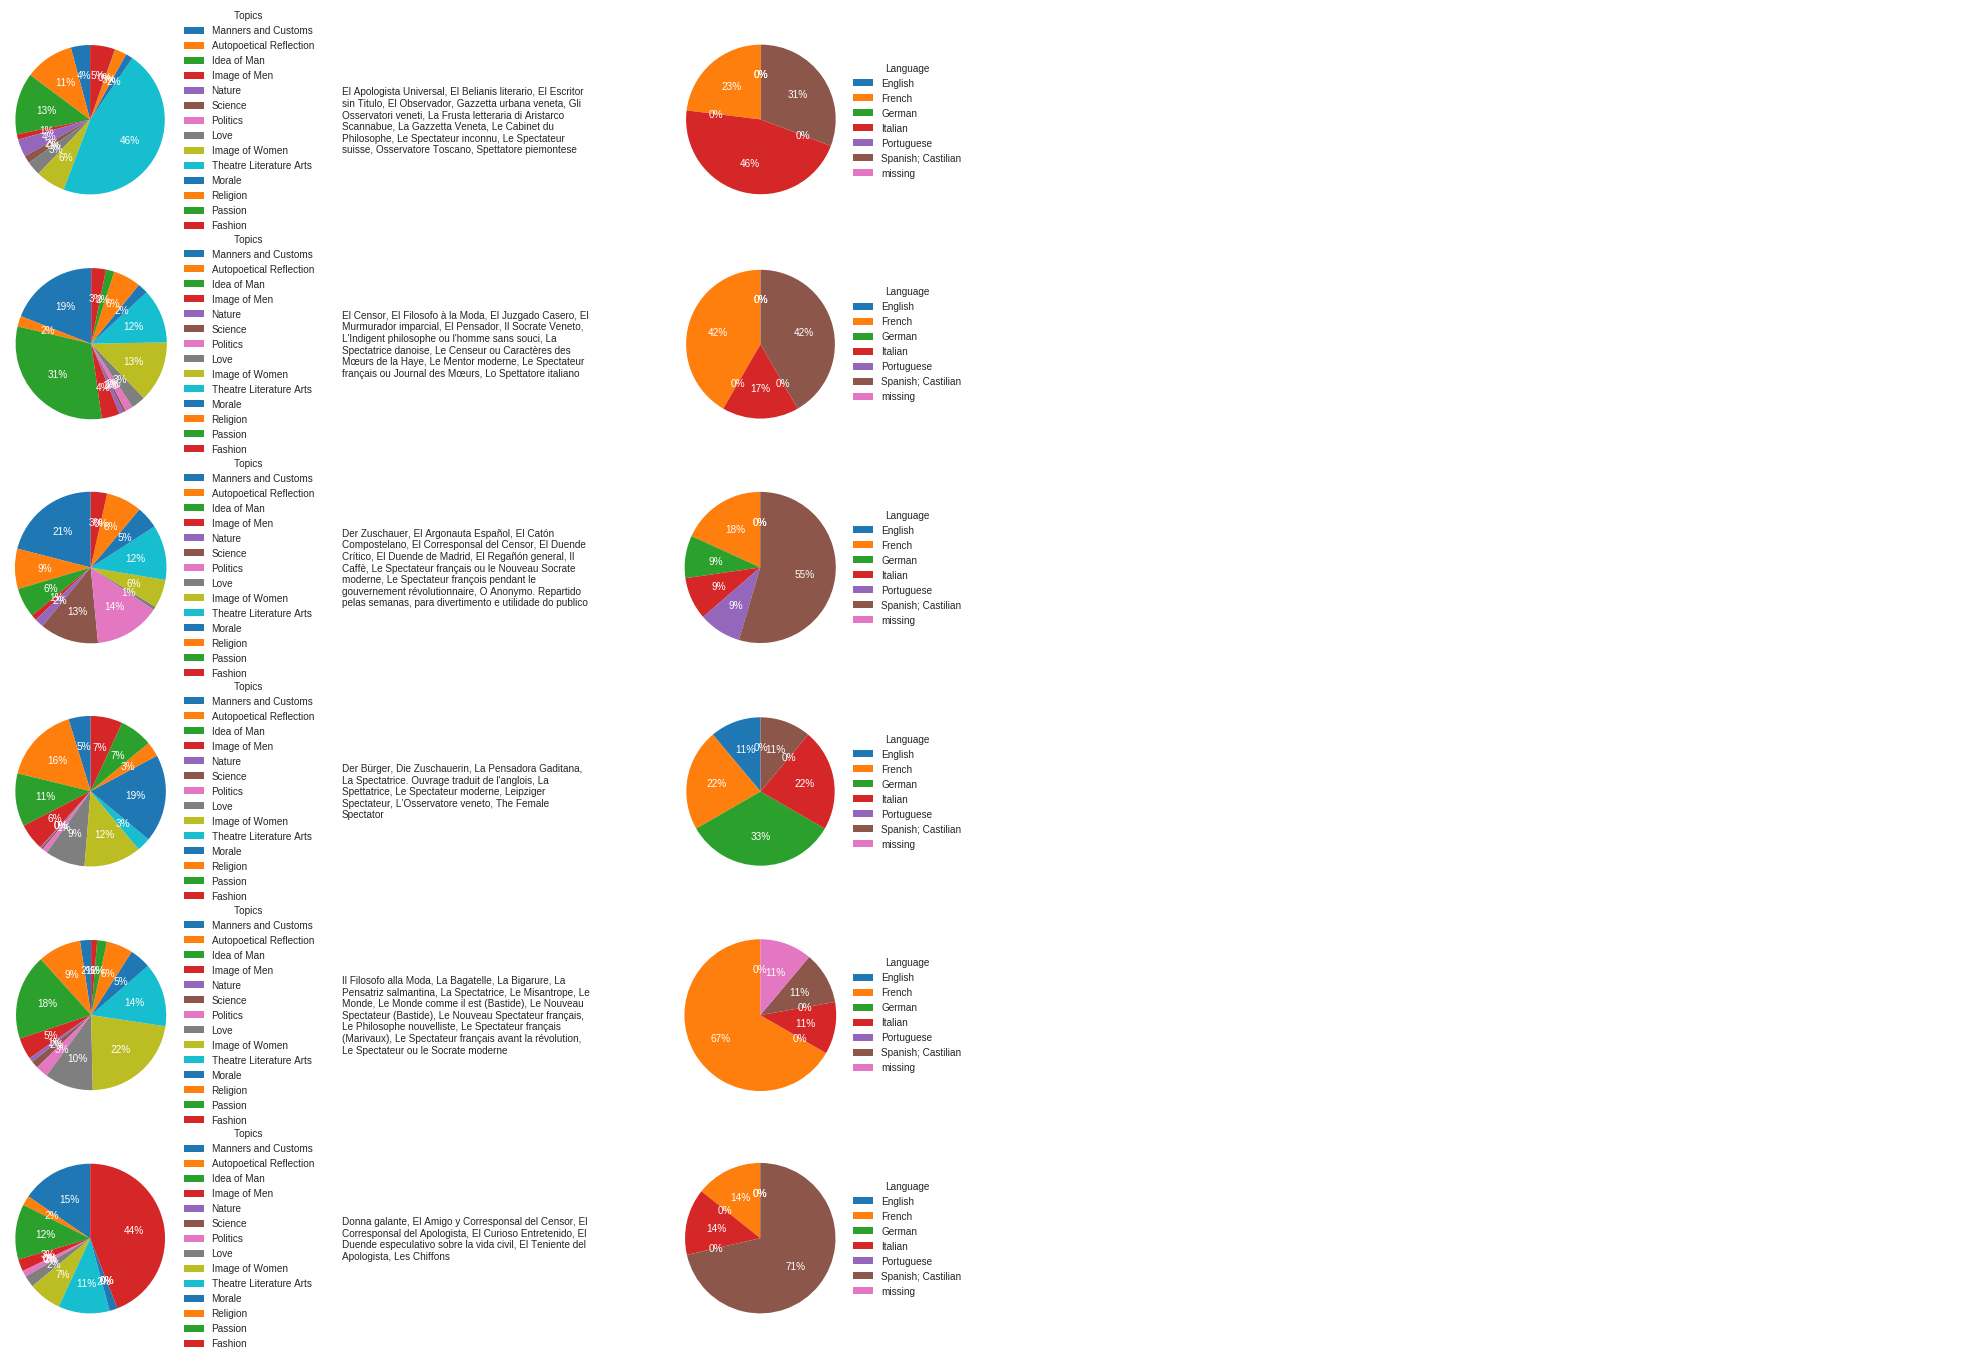

In [36]:
import matplotlib.pyplot as plt
f, axs = plt.subplots(Number_of_Clusters, 3, figsize=(15,4*Number_of_Clusters))
f.subplots_adjust(wspace = 1) 
for Cluster in range(Number_of_Clusters):
    wedges, texts, autotexts = axs[Cluster][0].pie(topics_language.loc[best_m.qt_x[Cluster]==1,:].mean(), autopct='%1.f%%', \
            startangle=90,textprops=dict(color="w"))
    axs[Cluster][0].legend(wedges, topics_language.columns,title="Topics",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
    axs[Cluster][0].axis('equal')
    axs[Cluster][1].axis([0, 1, 0, 1])
    axs[Cluster][1].axis('off')
    txt=axs[Cluster][1].text(0, 0.5, ', '.join(topics_language.index[best_m.qt_x[Cluster]==1].values), ha='left',va='center', wrap=True)
    txt._get_wrap_line_width = lambda : 250.
    wedges, texts, autotexts = axs[Cluster][2].pie(language_journal.loc[best_m.qt_x[Cluster]==1,:].sum(), autopct='%1.f%%', \
            startangle=90,textprops=dict(color="w"))
    axs[Cluster][2].legend(wedges, language_journal.columns,title="Language",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
    axs[Cluster][2].axis('equal')
    f.show()
    f.savefig("results/plots/topics/main_topics_summary_"+str(Number_of_Clusters)+"_Clusters.pdf",bbox_inches='tight')